In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [91]:
apps = pd.read_csv('apps.csv')

In [92]:
apps.drop('Unnamed: 0', axis = 1, inplace = True)

In [93]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [94]:
reviews = pd.read_csv('with_labels.csv')

In [95]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8207 entries, 0 to 8206
Data columns (total 13 columns):
App               8207 non-null object
Category          8207 non-null object
Rating            8207 non-null float64
Reviews           8207 non-null int64
Size              8207 non-null float64
Installs          8207 non-null int64
Type              8207 non-null object
Price             8207 non-null float64
Content Rating    8207 non-null object
Genres            8207 non-null object
Last Updated      8207 non-null object
Current Ver       8207 non-null object
Android Ver       8207 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 833.6+ KB


In [96]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

# Exploratory Data Analysis

In this section, I aim to find some basic patterns in the data. Some of these questions are "Which category gives the most installs?", "Which category yields the most money?",  and "Which categories have more paid-for apps, and does that mean more people download those?"

In [97]:
apps['Category'].nunique()

33

## How likely is an app going to be "paid" for?

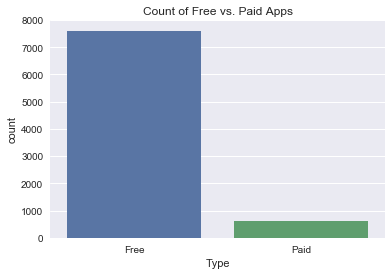

In [98]:
_ = sns.countplot(x = 'Type', data = apps)
_ = plt.title('Count of Free vs. Paid Apps')


In [99]:
(len(apps.loc[apps['Type'] == 'Paid'])/len(apps))*100

7.335201657121969

There are way more free apps than paid apps, which is expected. Only around 7% of the apps in this dataset are categorized as Paid apps. 

## Most Paid for apps come from 4 main categories

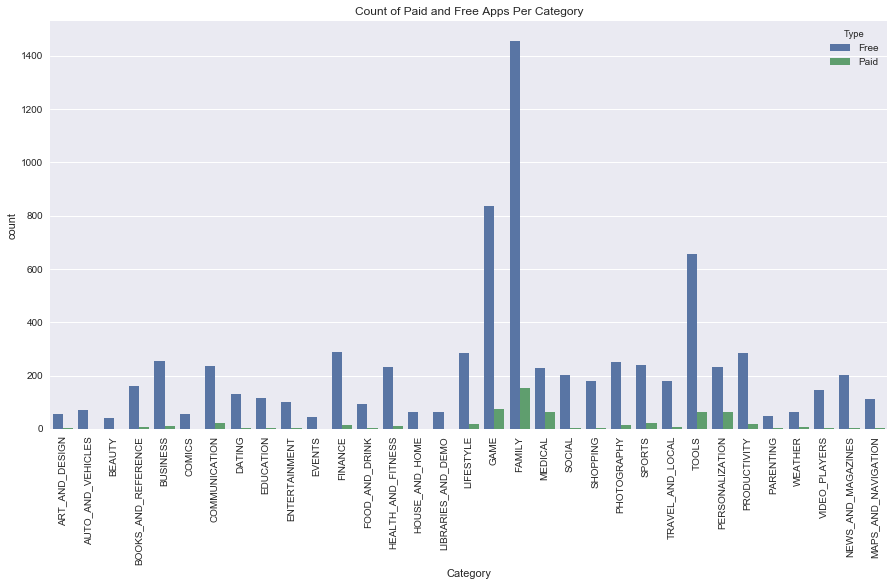

In [100]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,7.5))
sns.countplot(x = 'Category', data = apps, hue = 'Type', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Count of Paid and Free Apps Per Category')


Some takeaways: Family and games have the highest amount of apps available for both free and paid services. Tools Surprisingly comes in 3rd for the free apps, but not for the paid. Medical has a pretty high "free-to-paid" ratio.

This project must also take into account that this does not factor in **in-app purchases**

## Which category has the highest percentage of paid apps?

In [101]:
percents = dict()
for i in apps['Category'].unique():
    percent = (len(apps.loc[apps['Category'] == i].loc[apps['Type'] == 'Paid'])/len(apps.loc[apps['Category'] == i]))*100
    percents[i] = percent

                                                      

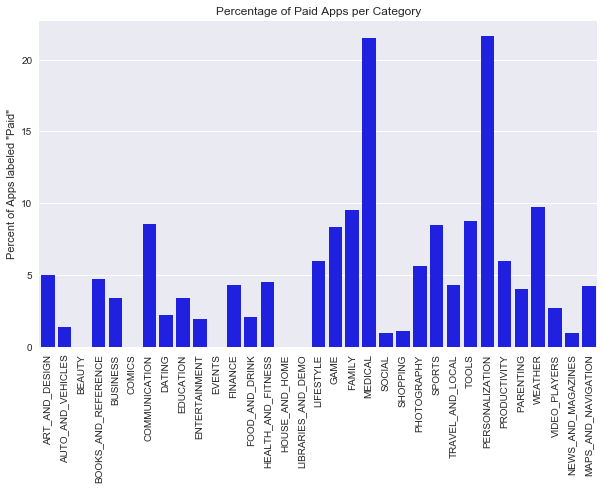

In [102]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(percents.keys()), y = list(percents.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Percentage of Paid Apps per Category')
_ = plt.ylabel('Percent of Apps labeled "Paid"')
                             

The highets percentage of paid apps is Medical at 25%, and the second highest is personalization at around 21%. "Personalization" apps are the types of apps that allow you to customize the way your phone operates, sush as changing your phones wallpapers, stock functions like the keyboard and photo app, or changing your Operating System/ Launcher. 

Also take note that this is only on the Google Play Store. On the iPhone app store, unless you jailbreak your phone, you cannot customize your OS, keyboard, etc., so this category probably would not have as many apps. Android users pride themselves on being able to customize their phones, and this seems to be representative of that fact. 

## Which categories' paid apps are installed at the highest rate?

In [103]:
percent_installs = dict()
for i in apps['Category'].unique():
    percent = np.sum(apps.loc[apps['Category'] == i].loc[apps['Type'] == 'Paid']['Installs'])/np.sum(apps.loc[apps['Category'] == i]['Installs'])*100
    percent_installs[i] = percent

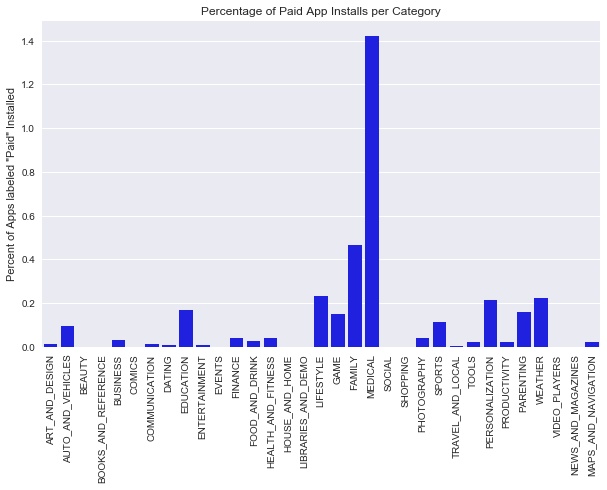

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(percent_installs.keys()), y = list(percent_installs.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Percentage of Paid App Installs per Category')
_ = plt.ylabel('Percent of Apps labeled "Paid" Installed')
                             

By adding up all of the installs in the paid section of each category, and dividing it by the total amount of installs in that category, I have found that the medical category has the highest percentage of installs for paid apps, but even then, it is only at around 1.4% of all installs in that category. 

This is interesting to see. 25% of all medical apps are paid for, but only 1.4% of the installs make up for them all.

## Do more paid apps lead to more installs of those paid apps?

In [105]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource


In [106]:
percent_vs_installs = pd.DataFrame({'Category':list(percents.keys()), 'Install Percent': list(percent_installs.values()), 'Percent Paid': list(percents.values())})

In [107]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Percentage of Apps Paid', y_axis_label = 'Percentage of Installs of Paid Apps')
source = ColumnDataSource(data = percent_vs_installs)
plot.circle(x = 'Percent Paid', y = 'Install Percent', size = 9, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('Category', '@Category')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [108]:
corr = np.corrcoef(percent_vs_installs['Percent Paid'], percent_vs_installs['Install Percent'])[0,1]**2
corr

0.5030824106095708

It looks like theres a slightly positive correlation between the percentage of paid apps vs the percentage of apps installed that are paid for with an $R^2$ of about 0.5. It seems like there are many apps in the "personalization" category, but only about 0.2% of app installs are from paid apps, which indicates that you probably should not develop these apps if you are expecting people to buy your apps. Once again, Family stands out as a category that has a high percentage of paid app installs compared to the percentage of apps that are paid for. 

## What is the average price of the paid apps in each category?

In [109]:
prices = dict()
for i in apps['Category'].unique():
    price = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Price'])
    prices[i] = price

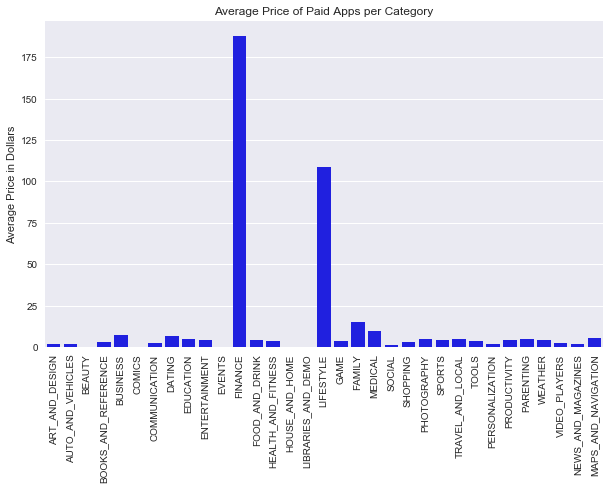

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(prices.keys()), y = list(prices.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Average Price of Paid Apps per Category')
_ = plt.ylabel('Average Price in Dollars')

Something about Finance and Lifestyle apps is making the average price become insanely high. We'll scope it out.

In [111]:
apps.loc[apps['Category'] == 'FINANCE'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price',ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4110,I Am Rich Premium,FINANCE,4.1,1867,9.8,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
4112,I am Rich!,FINANCE,3.8,93,15.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
4113,I am rich(premium),FINANCE,3.5,472,15.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
4118,I am rich (Most expensive app),FINANCE,4.1,129,15.0,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up
4123,I am Rich,FINANCE,4.3,180,9.5,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up
4127,I AM RICH PRO PLUS,FINANCE,4.0,36,5.7,1000,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up
4115,I am Rich Premium Plus,FINANCE,4.6,459,30.0,10000,Paid,18.99,Everyone,Finance,2018-02-17,1.1,4.0.3 and up
5297,Bitcoin BX Thailand PRO,FINANCE,1.7,21,26.0,100,Paid,4.99,Everyone,Finance,2017-10-22,5.0,4.0.3 and up
4560,Ba Financial Calculator plus,FINANCE,4.4,31,13.0,1000,Paid,3.99,Everyone,Finance,2018-07-15,2.9.1,2.1 and up
4561,Financial Calculator BA Chien.,FINANCE,4.2,23,5.9,500,Paid,3.99,Everyone,Finance,2016-12-14,1.9.10,3.0 and up


ahh.... there are a few apps that were made for the sole purpose of boasting about how much money you have, and they all cost aroun $400 each. I would drop these, but they actually have a few downloads, especially one with over 50,000.

In [112]:
apps.loc[apps['Category'] == 'LIFESTYLE'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price',ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3313,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,2.2,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
3309,💎 I'm rich,LIFESTYLE,3.8,718,93.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4106,I am rich,LIFESTYLE,3.8,3547,12.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
4111,I am extremely Rich,LIFESTYLE,2.9,41,5.7,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
4109,I am rich VIP,LIFESTYLE,3.8,411,85.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
4114,I am Rich Person,LIFESTYLE,4.2,134,46.0,1000,Paid,37.99,Everyone,Lifestyle,2017-07-18,1.0,4.0.3 and up
5456,My Movies Pro - Movie & TV Collection Library,LIFESTYLE,4.6,6477,50.0,10000,Paid,7.99,Everyone,Lifestyle,2018-07-16,2.26 Build 17,4.1 and up
4299,Sleep as Android Unlock,LIFESTYLE,4.5,23966,46.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up
4507,Lunar Calendar,LIFESTYLE,4.5,484,2.6,1000,Paid,4.99,Mature 17+,Lifestyle,2018-07-17,Varies with device,Varies with device
6760,The Secret Daily Teachings,LIFESTYLE,4.3,206,6.3,1000,Paid,4.99,Everyone,Lifestyle,2018-02-11,14.0,4.0.3 and up


It's the same deal as in the lifestyle category, except one of these exceeds 100,000 installs. People are crazy. When I am doing further analysis, I will drop these values

## How much money do the paid apps pull in for each category?

In [113]:
#Adding a revenue column, which will be the price of the app times how many times it was installed
apps['Revenue'] = apps['Installs']*apps['Price']

Of course, this revenue column is making 2 big assumptions. The first is that the app was bought with the price that is advertised. There may have been sales which result in a download of a lower price, but I am assuming that most, if not all, of the apps were downloaded at full price. The second assumption is that the amount of installs is fairly close to the number it says. Before cleaning, there was a "+" at the end, indicating that it could be over that amount, and the increments, especially as the amount of installs increases, gets larger and larger. For example, an app could quite possibly have 85 million installs, but it will be labeled as 10,000,000+, even though it is closer to 100,000,000.

In [114]:
total_rev = dict()
for i in apps['Category'].unique():
    revenue = np.sum(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Revenue'])
    total_rev[i] = revenue

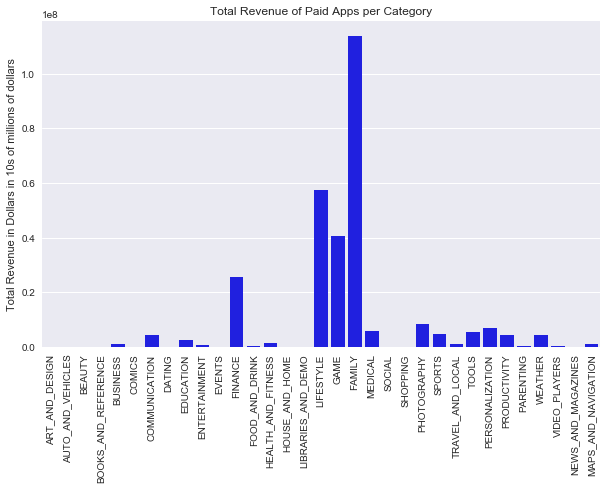

In [115]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(total_rev.keys()), y = list(total_rev.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Total Revenue of Paid Apps per Category')
_ = plt.ylabel('Total Revenue in Dollars in 10s of millions of dollars')

Family has the most amount of revenue, but as we saw earlier, it also has the highest number of apps.

In [116]:
revenues = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Revenue'])
    revenues[i] = revenue

In [117]:
median_revs = dict()
for i in apps['Category'].unique():
    revenue = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Revenue'])
    median_revs[i] = revenue

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


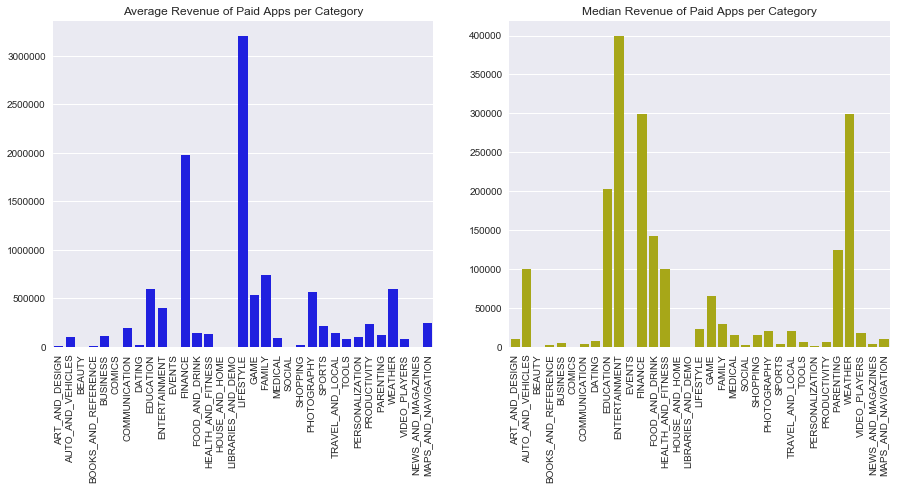

In [118]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

_ = sns.barplot(x = list(revenues.keys()), y = list(revenues.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(median_revs.keys()), y = list(median_revs.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Revenue of Paid Apps per Category')
_ = ax[1].set_title('Median Revenue of Paid Apps per Category')
_ = ax[0].set_xticklabels(list(revenues.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(median_revs.keys()), rotation=90)


Those "I am rich" apps seem to still be swaying the numbers a bit. Inititially, in this step, I found that Photography had a high average revenue, but then after checking the data, I found that one app that cost around $6 and was downloaded 1,000,000+ times was repeated 3 or 4 times, leading to a huge shift in the data. This led me to go back into the wrangling step and remove duplicates in that stage. 

Changing to the median revenue, it is interesting to see how much the entertainment category increases and actually becomes the highest revenue based on median.  

What's suprising to me is the high average revenue for weather apps. Let's take a look.

In [119]:
apps.loc[apps['Category'] == 'WEATHER'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8031,Florida Tides & Weather,WEATHER,3.8,30,15.000,1000,Paid,6.99,Everyone,Weather,2015-05-06,2.0.0,2.3 and up,6990.0
3134,Weather Live,WEATHER,4.5,76593,15.000,500000,Paid,5.99,Everyone,Weather,2017-11-21,Varies with device,Varies with device,2995000.0
2764,Weather Live Pro,WEATHER,4.8,17493,12.000,100000,Paid,4.49,Everyone,Weather,2018-04-20,1.3,4.4 and up,449000.0
6783,Weather Forecast Pro,WEATHER,4.7,14051,7.000,100000,Paid,3.99,Everyone,Weather,2018-08-04,8.5,4.0 and up,399000.0
3822,MyRadar NOAA Weather Radar Ad Free,WEATHER,4.5,3005,5.300,10000,Paid,2.99,Everyone,Weather,2018-08-04,7.1.4,4.0.3 and up,29900.0
3829,Weather & Radar Pro - Ad-Free,WEATHER,4.5,25243,0.169,100000,Paid,2.99,Everyone,Weather,2018-08-01,4.34.0,4.4 and up,299000.0
3611,W Pro - Weather Forecast & Animated Weather Maps,WEATHER,3.8,11,26.000,500,Paid,1.99,Everyone,Weather,2018-04-23,1.0,4.1 and up,995.0


This high value for average revenue for weather apps may be because there are only 7 weather apps that require you to pay,so the average is swayed by the 'Weather Live' app that has been downloaded more than the rest coombined.

In [120]:
apps.sort_values(by = 'Revenue', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
1665,Minecraft,FAMILY,4.5,2376564,22.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
4106,I am rich,LIFESTYLE,3.8,3547,12.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,39999000.0
4110,I Am Rich Premium,FINANCE,4.1,1867,9.8,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,19999500.0
3069,Hitman Sniper,GAME,4.6,408292,26.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,9900000.0
5604,Grand Theft Auto: San Andreas,GAME,4.4,348962,4.5,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,6990000.0
2133,Facetune - For Free,PHOTOGRAPHY,4.4,49553,15.0,1000000,Paid,5.99,Everyone,Photography,2018-07-25,1.3.1,4.1 and up,5990000.0
4299,Sleep as Android Unlock,LIFESTYLE,4.5,23966,46.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,5990000.0
6698,DraStic DS Emulator,GAME,4.6,87766,5.1,1000000,Paid,4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up,4990000.0
3313,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,2.2,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4000000.0
3309,💎 I'm rich,LIFESTYLE,3.8,718,93.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,3999900.0


Minecraft has the highest revenue of all apps at a whopping 69.9 million dollars. Surprisingly, 4 of the top 10 apps with the highest revenues are those "I'm Rich" apps. Besides those apps, 3 of the top 10 are in the game category, though Minecraft is actually a game as well. 

Also note that this data may not be 100% trustworthy. Many developers try to boost their app's ratings and install count by fraudulent means, meaning they either pay people to give 5 star reviews or to install the app. This may be the case for a few apps on here, but supposedly, in October 2016, Google Play decided to crack down on apps and prevent these things from happening. Whether or not they removed the installs and ratings from before is unknown to me, but that could explain why over 100,000 people bought a useless app for almost $400. 

Another thing that may explain the high amount of downloads in those types of apps is that they may have been on sale or been free for a promotion, which allowed it to increase in amount of downloads.

Let's see what the bar chart looks like without those apps in there.

### Removing the expensive useless apps

In [121]:
revenues_cheap = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid'].loc[apps['Price'] < 200]['Revenue'])
    revenues_cheap[i] = revenue

In [122]:
revenues_cheap_med = dict()
for i in apps['Category'].unique():
    revenue = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid'].loc[apps['Price'] < 200]['Revenue'])
    revenues_cheap_med[i] = revenue

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


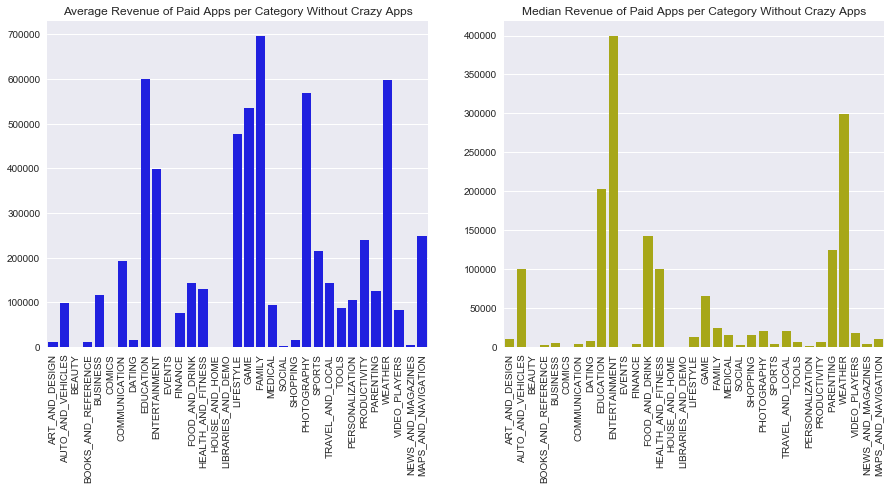

In [123]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(revenues_cheap.keys()), y = list(revenues_cheap.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(revenues_cheap_med.keys()), y = list(revenues_cheap_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Revenue of Paid Apps per Category Without Crazy Apps')
_ = ax[1].set_title('Median Revenue of Paid Apps per Category Without Crazy Apps')
_ = ax[0].set_xticklabels(list(revenues_cheap.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(revenues_cheap_med.keys()), rotation=90)

These bar charts look a lot better. We can immediately see that Family has the highest average revenue, but education, weather, and photography are all high up there too. 

Just like that, the median revenue for Finance goes down drastically. Entertainment remains the highest median revenue. The best balance between median and average revenue seems to be the weather apps, but as we saw earlier, this could be from the low number of paid apps in this category. 

In [124]:
apps.loc[apps['Category'] == 'EDUCATION'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False)
#There are only 4 apps in the paid education category, so this may cause a skew in the data.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
638,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,15.0,1000,Paid,5.99,Everyone,Education;Education,2017-07-21,1.3,4.1 and up,5990.0
637,Sago Mini Hat Maker,EDUCATION,4.9,11,15.0,1000,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24,1.0,4.0.3 and up,3990.0
639,Toca Life: City,EDUCATION,4.7,31085,16.0,500000,Paid,3.99,Everyone,Education;Pretend Play,2018-07-06,1.5-play,4.4 and up,1995000.0
640,Toca Life: Hospital,EDUCATION,4.7,3528,9.6,100000,Paid,3.99,Everyone,Education;Pretend Play,2018-06-12,1.1.1-play,4.4 and up,399000.0


In [125]:
installs = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i]['Installs'])
    installs[i] = revenue

In [126]:
installs_med = dict()
for i in apps['Category'].unique():
    revenue = np.median(apps.loc[apps['Category']==i]['Installs'])
    installs_med[i] = revenue

## Which categories get the most installs?

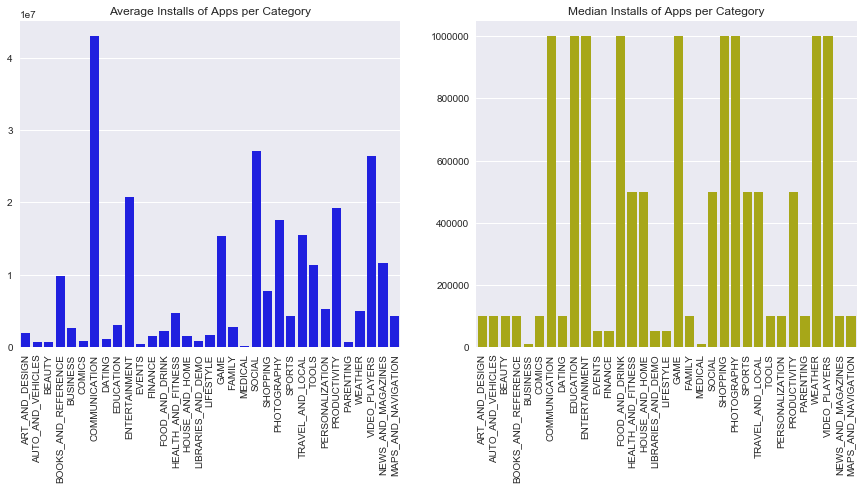

In [127]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(installs.keys()), y = list(installs.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(installs_med.keys()), y = list(installs_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Installs of Apps per Category')
_ = ax[1].set_title('Median Installs of Apps per Category')
_ = ax[0].set_xticklabels(list(installs.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(installs_med.keys()), rotation=90)


The highest median installs belong to communication, education, entertainment, food and drinks, game, shopping, photography, weather, and video players. 

#### Food And Drink apps are mostly free and are provided by restaurant chains and delivery services. There might be some room for independent developers though 

In [128]:
apps.loc[apps['Category'] == 'FOOD_AND_DRINK'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
891,McDonald's,FOOD_AND_DRINK,3.6,145323,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-07-31,5.15.0,4.4 and up,0.0
963,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.0,292969,78.0,10000000,Free,0.0,Everyone,Food & Drink,2018-07-30,4.11.3,4.2 and up,0.0
949,Foursquare City Guide,FOOD_AND_DRINK,4.1,483960,13.0,10000000,Free,0.0,Teen,Food & Drink,2018-07-23,Varies with device,Varies with device,0.0
944,Cookpad,FOOD_AND_DRINK,4.5,131569,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-08-03,2.76.2.0-android,4.2 and up,0.0
892,Cookpad - FREE recipe search makes fun cooking...,FOOD_AND_DRINK,4.1,64784,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-08-02,18.6.0.10,5.0 and up,0.0
956,Pizza Hut,FOOD_AND_DRINK,4.4,321134,93.0,10000000,Free,0.0,Everyone,Food & Drink,2018-06-12,4.7.0,4.1 and up,0.0
959,Uber Eats: Local Food Delivery,FOOD_AND_DRINK,4.2,333208,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-08-01,1.161.10002,5.0 and up,0.0
916,Delivery yogi.,FOOD_AND_DRINK,4.4,90042,9.4,10000000,Free,0.0,Everyone,Food & Drink,2018-07-18,Varies with device,Varies with device,0.0
912,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935,27.0,10000000,Free,0.0,Everyone,Food & Drink,2018-07-20,Varies with device,Varies with device,0.0
910,Starbucks,FOOD_AND_DRINK,4.5,455377,25.0,10000000,Free,0.0,Everyone,Food & Drink,2018-08-01,4.11.1,4.4 and up,0.0


#### Educational apps have many apps with a lot of downloads, and many of them are by independent developers. Might be a good place for them to make an app.

In [129]:
apps.loc[apps['Category'] == 'EDUCATION'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
523,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,2.0,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device,0.0
626,ClassDojo,EDUCATION,4.4,148550,15.0,10000000,Free,0.0,Everyone,Education;Education,2018-08-03,4.21.1,4.1 and up,0.0
602,Google Classroom,EDUCATION,4.2,69493,41.0,10000000,Free,0.0,Everyone,Education,2018-07-19,Varies with device,Varies with device,0.0
560,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107903,76.0,10000000,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device,0.0
561,Quizlet: Learn Languages & Vocab with Flashcards,EDUCATION,4.6,211856,15.0,10000000,Free,0.0,Everyone,Education,2018-08-01,Varies with device,Varies with device,0.0
611,"busuu: Learn Languages - Spanish, English & More",EDUCATION,4.3,206527,15.0,10000000,Free,0.0,Everyone 10+,Education,2018-08-01,13.9.0.161,5.0 and up,0.0
524,TED,EDUCATION,4.6,181893,1.9,10000000,Free,0.0,Everyone 10+,Education,2018-07-27,3.2.5,4.1 and up,0.0
541,Math Tricks,EDUCATION,4.5,342918,15.0,10000000,Free,0.0,Everyone,Education,2018-07-29,2.24,4.0 and up,0.0
567,Peak – Brain Games & Training,EDUCATION,4.4,272145,14.0,10000000,Free,0.0,Everyone,Education;Brain Games,2018-08-03,3.14.15,5.0 and up,0.0
622,Edmodo,EDUCATION,4.1,200058,15.0,10000000,Free,0.0,Everyone,Education,2018-07-20,9.12.5,4.0.3 and up,0.0


#### Alost every single app in the top 10 of the communications category are by major companies. Maybe not much room for an independent dev. 

In [130]:
apps.loc[apps['Category'] == 'COMMUNICATION'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
286,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,15.000,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0
287,WhatsApp Messenger,COMMUNICATION,4.4,69119316,15.000,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
289,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,15.000,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0
291,Gmail,COMMUNICATION,4.3,4604324,15.000,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,0.0
292,Hangouts,COMMUNICATION,4.0,3419249,15.000,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,0.0
336,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,15.000,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
344,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,2.800,500000000,Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device,0.0
322,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,0.079,500000000,Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up,0.0
298,imo free video calls and chat,COMMUNICATION,4.3,4785892,15.000,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,0.0
329,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,15.000,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,0.0


#### Entertainment may provide a good playing field for independent developers, as about half are not by major companies. 

In [131]:
apps.loc[apps['Category'] == 'ENTERTAINMENT'].sort_values(by = 'Installs', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
651,Google Play Games,ENTERTAINMENT,4.3,7165362,17.0,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,0.0
641,Netflix,ENTERTAINMENT,4.4,5456208,15.0,100000000,Free,0.0,Teen,Entertainment,2018-07-31,Varies with device,Varies with device,0.0
674,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,13.0,100000000,Free,0.0,Teen,Entertainment,2018-07-26,Varies with device,Varies with device,0.0
679,Talking Ben the Dog,ENTERTAINMENT,4.3,1633682,19.0,100000000,Free,0.0,Everyone,Entertainment,2018-07-03,3.5.2.2,4.1 and up,0.0
660,Talking Angela,ENTERTAINMENT,3.7,1828284,19.0,100000000,Free,0.0,Everyone,Entertainment,2018-07-12,2.8.2,4.1 and up,0.0
652,Hotstar,ENTERTAINMENT,4.3,4885646,15.0,100000000,Free,0.0,Teen,Entertainment,2018-08-03,Varies with device,Varies with device,0.0
675,Twitch: Livestream Multiplayer Games & Esports,ENTERTAINMENT,4.6,2133296,17.0,50000000,Free,0.0,Teen,Entertainment,2018-07-31,Varies with device,Varies with device,0.0
665,Talking Ginger 2,ENTERTAINMENT,4.2,702975,11.0,50000000,Free,0.0,Everyone,Entertainment,2018-07-05,2.6.6.11,4.1 and up,0.0
678,PlayStation App,ENTERTAINMENT,4.2,613059,20.0,50000000,Free,0.0,Everyone,Entertainment,2018-07-26,18.07.0,4.1 and up,0.0
672,Amazon Prime Video,ENTERTAINMENT,4.2,411683,15.0,50000000,Free,0.0,Teen,Entertainment,2018-08-02,3.0.231.18141,4.1 and up,0.0


At this point in my analysis, if I were giving advice to a small developer I would advise him or her to begin production in either an educational app or a medical app if he wants to get paid. Medical apps have the highest percentage of apps that are paid for, and educational apps have a very high average and median revenue, though the small sample size may render this observation fruitless. 

If a developer were looking for a high amount of downloads so that he can use that to place ads on his app or to get his name out there, my recommendation would be for that person to make an app in the "game" category. They could also make an "entertainment" type app. Only about half of the top 10 most installs in that category are by large companies, but make sure the app is something for children. 

In [132]:
apps.to_csv('apps_rev.csv')

## What about the mean number of installs for paid apps?

In [133]:
paid_installs = dict()
for i in apps['Category'].unique():
    paid = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
    paid_installs[i] = paid

In [134]:
paid_installs_med = dict()
for i in apps['Category'].unique():
    paid = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
    paid_installs_med[i] = paid

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


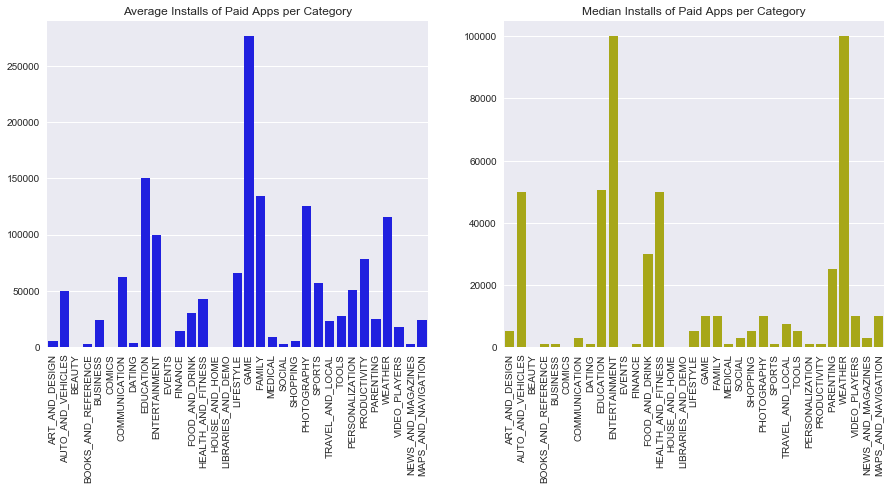

In [135]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(paid_installs.keys()), y = list(paid_installs.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(paid_installs_med.keys()), y = list(paid_installs_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Installs of Paid Apps per Category')
_ = ax[1].set_title('Median Installs of Paid Apps per Category')
_ = ax[0].set_xticklabels(list(paid_installs.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(paid_installs_med.keys()), rotation=90)

The games category has the highest average installs for paid apps, but it is fairly low for the median number of installs. This may be caused by a few outlier paid apps, such as MineCraft, having a very high number of installs compared to the rest of the apps in that category that are very low. 

The highest medians belong to weather and entertainment, at 100,000 installs per paid app. Weather has been explained because of the small sample size, but lets take a look at the entertainment category. 

In [136]:
apps.loc[apps['Category'] == 'ENTERTAINMENT'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
734,My Talking Pet,ENTERTAINMENT,4.6,6238,40.0,100000,Paid,4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,499000.0
740,Meme Generator,ENTERTAINMENT,4.6,3771,10.0,100000,Paid,2.99,Mature 17+,Entertainment,2018-08-03,4.426,4.1 and up,299000.0


Interestingly enough, there are only 2 apps in this category. Let's look what happens if we filter out the categories with less apps. 

In [137]:
paid_installs_more = dict()
for i in apps['Category'].unique():
    if len(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']) > 10:
        more = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
        paid_installs_more[i] = more

In [138]:
paid_installs_more_med = dict()
for i in apps['Category'].unique():
    if len(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']) > 10:
        more = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
        paid_installs_more_med[i] = more

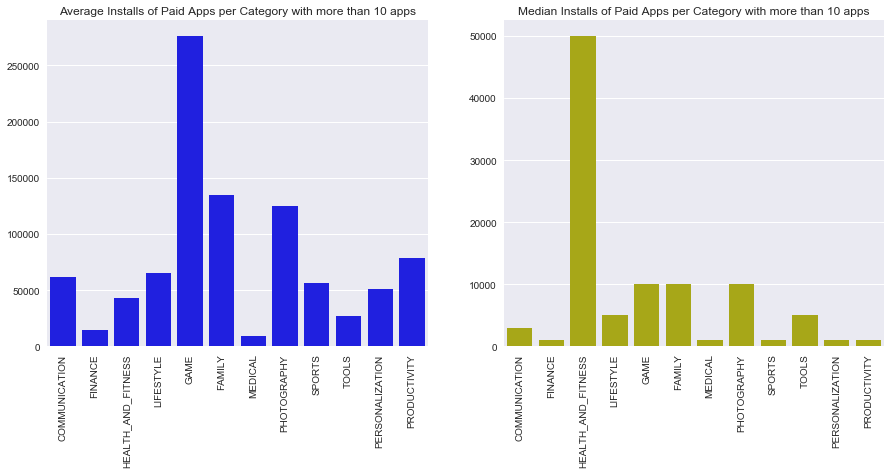

In [139]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(paid_installs_more.keys()), y = list(paid_installs_more.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(paid_installs_more_med.keys()), y = list(paid_installs_more_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Installs of Paid Apps per Category with more than 10 apps')
_ = ax[1].set_title('Median Installs of Paid Apps per Category with more than 10 apps')
_ = ax[0].set_xticklabels(list(paid_installs_more.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(paid_installs_more_med.keys()), rotation=90)

Only 12 apps survived this filter, but games prevailed for the highest average number of installs for paid apps, but seemingly out of nowhere, health and fitness has the highest median installs at 50,000. Let's check it out

In [140]:
apps.loc[apps['Category'] == 'HEALTH_AND_FITNESS'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
8153,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,15.000,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,7990.0
7361,The EO Bar,HEALTH_AND_FITNESS,4.7,416,15.000,10000,Paid,6.99,Everyone,Health & Fitness,2018-07-02,1.3.7,4.1 and up,69900.0
6686,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,3.8,76,0.376,1000,Paid,4.99,Everyone,Health & Fitness,2015-01-26,1.1,2.2 and up,4990.0
1038,Meditation Studio,HEALTH_AND_FITNESS,4.6,1026,3.300,10000,Paid,3.99,Everyone,Health & Fitness,2018-05-15,1.0.6,4.3 and up,39900.0
6204,Tools & Mi Band,HEALTH_AND_FITNESS,4.4,15753,15.000,100000,Paid,3.49,Everyone,Health & Fitness,2018-07-26,3.7.3,4.3 and up,349000.0
1030,Pocket Yoga,HEALTH_AND_FITNESS,4.4,2107,3.800,100000,Paid,2.99,Everyone,Health & Fitness,2015-12-22,Varies with device,Varies with device,299000.0
1044,Relax Melodies P: Sleep Sounds,HEALTH_AND_FITNESS,4.8,19543,3.800,100000,Paid,2.99,Everyone,Health & Fitness,2018-01-19,Varies with device,Varies with device,299000.0
3819,cronometer (ad free),HEALTH_AND_FITNESS,3.9,1075,2.800,50000,Paid,2.99,Everyone,Health & Fitness,2018-07-13,2.1.2,4.4 and up,149500.0
3741,Daily Ab Workout,HEALTH_AND_FITNESS,4.6,2901,3.700,50000,Paid,1.99,Everyone,Health & Fitness,2018-06-14,Varies with device,Varies with device,99500.0
4307,Lullaby Add-on for Sleep as Android,HEALTH_AND_FITNESS,3.9,2057,14.000,50000,Paid,1.99,Everyone,Health & Fitness,2017-10-18,2.4,4.0 and up,99500.0


Funnily enough, there are exactly 11 apps in this, but they are all done by 3rd party developers. Maybe this is the area that you want to be in if you want a high number of installs for your paid app. 

# Checking to see if the rating of an app affects the number of installs

In [141]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Rating', y_axis_label = 'Number of Installs (log scale)', y_axis_type = 'log')
source = ColumnDataSource(data = apps)
plot.circle(x = 'Rating', y = 'Installs', size = 5, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [142]:
corr = np.corrcoef(apps['Rating'], np.log(apps['Installs']))[0,1]**2
corr

0.007178391670269801

It seems that there is a slight correlation in the log transformed number of installs and the rating that the app has on the app score, but the correlation is near zero. If there was a correlation, then that would have meant that there was an exponential relationship between rating and the number of installs, but I guess there isn't. The reason that this may look like there is a correlation is because, as the installs get higher, there are also less apps present, so even though it looks there are apps up there, they do not sway the correlation that much. 

## Are there correlations between the fields I calculated?

In [143]:
size = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i]['Size'])
    size[i] = revenue

In [144]:
calced = pd.DataFrame({'Category':list(percents.keys()), \
                       'Paid Install Percent': list(percent_installs.values()), 'Percent of Apps Paid': list(percents.values()),\
                       'Number of Installs': list(installs.values()),'Median Installs': list(installs_med.values()),\
                      'Average Revenue':list(revenues_cheap.values()), 'Median Revenue':list(revenues_cheap_med.values()),\
                      'Size':list(size.values())})

In [145]:
calced.head()

,Category,Paid Install Percent,Percent of Apps Paid,Number of Installs,Median Installs,Average Revenue,Median Revenue,Size
0,ART_AND_DESIGN,0.014007,5.000000,1.903802e+06,100000.0,10613.333333,9950.0,16.965933
1,AUTO_AND_VEHICLES,0.094109,1.369863,7.278055e+05,100000.0,99500.000000,99500.0,18.896315
2,BEAUTY,0.000000,0.000000,6.408619e+05,100000.0,NaN,NaN,18.064286
3,BOOKS_AND_REFERENCE,0.001360,4.733728,9.856755e+06,100000.0,11112.687500,2535.0,17.839396
4,BUSINESS,0.030510,3.422053,2.650259e+06,10000.0,116405.377778,4990.0,19.625030


In [146]:
calced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
Category                33 non-null object
Paid Install Percent    33 non-null float64
Percent of Apps Paid    33 non-null float64
Number of Installs      33 non-null float64
Median Installs         33 non-null float64
Average Revenue         28 non-null float64
Median Revenue          28 non-null float64
Size                    33 non-null float64
dtypes: float64(7), object(1)
memory usage: 2.1+ KB


In [147]:
calced.fillna('0',inplace = True)

In [148]:
int_cols = ['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']

In [149]:
for i in int_cols:
    calced[i] = calced[i].astype(int)

In [150]:
calced.to_csv('calced.csv')

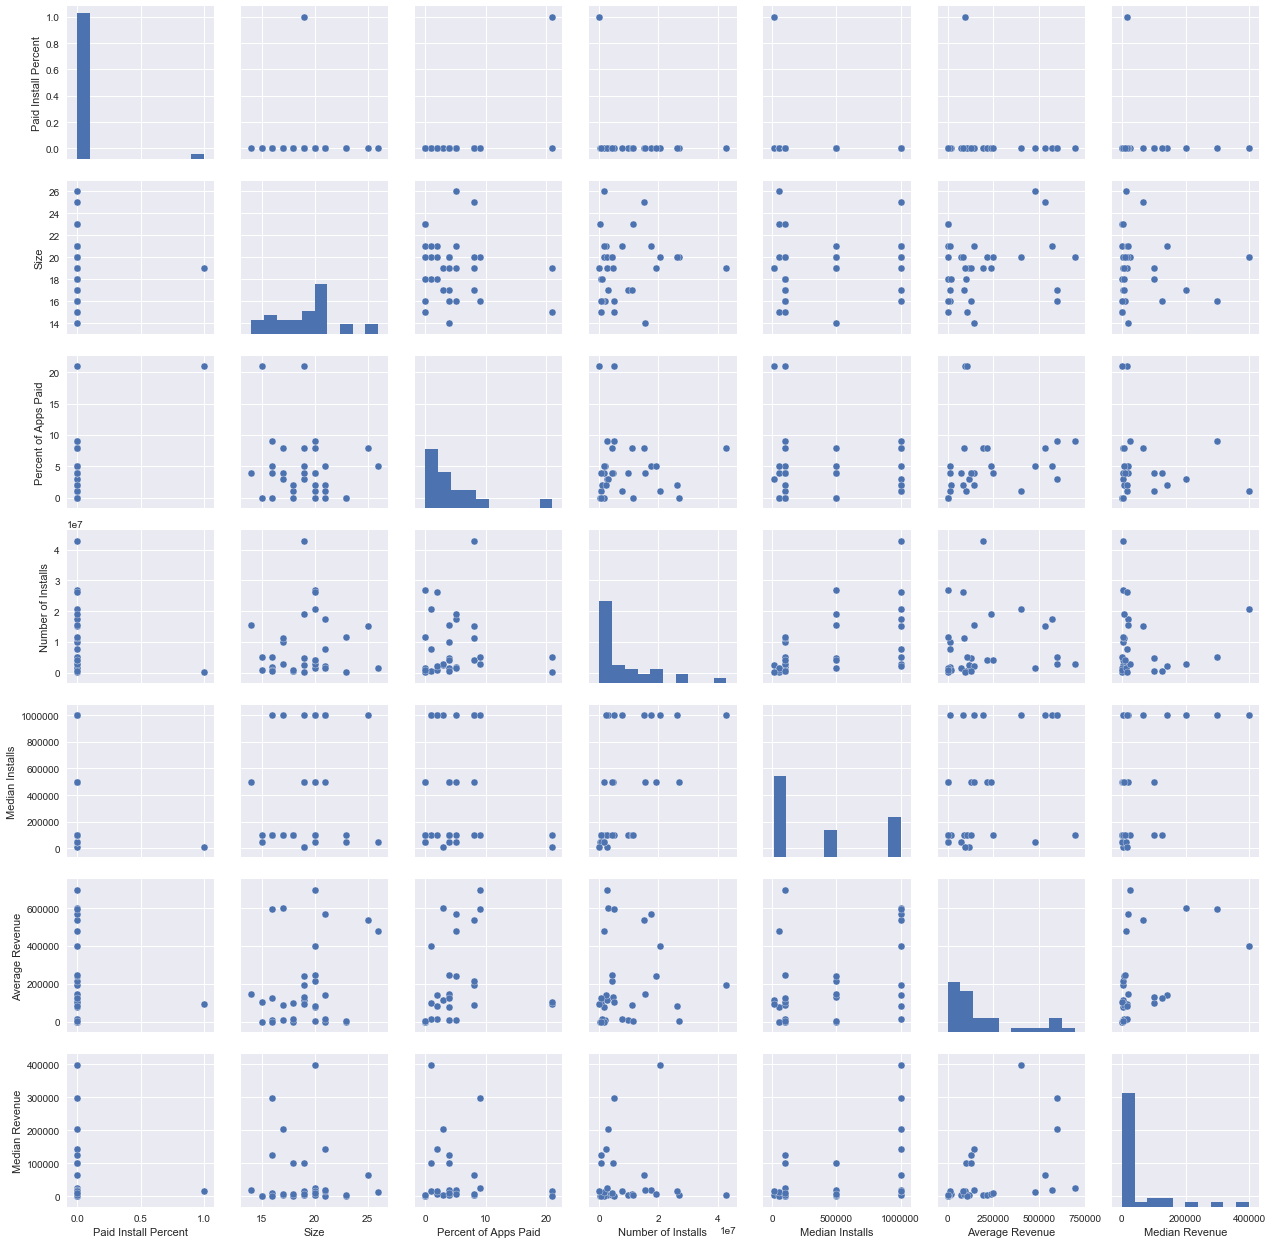

In [151]:
#Each point in the pair plot is a different category.
_ = sns.pairplot(calced[['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']])

In [152]:
calced[['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']].corr()

,Paid Install Percent,Size,Percent of Apps Paid,Number of Installs,Median Installs,Average Revenue,Median Revenue
Paid Install Percent,1.000000,-0.003909,0.576142,-0.145013,-0.177112,-0.075802,-0.066532
Size,-0.003909,1.000000,-0.160497,0.115713,0.186737,0.239413,-0.088681
Percent of Apps Paid,0.576142,-0.160497,1.000000,-0.009521,-0.082269,0.260107,-0.051104
Number of Installs,-0.145013,0.115713,-0.009521,1.000000,0.560909,0.105861,0.030893
Median Installs,-0.177112,0.186737,-0.082269,0.560909,1.000000,0.446857,0.505831
Average Revenue,-0.075802,0.239413,0.260107,0.105861,0.446857,1.000000,0.486284
Median Revenue,-0.066532,-0.088681,-0.051104,0.030893,0.505831,0.486284,1.000000


None of the calculated fields that I found seem to have that great of a correlation with one another. The strongest correlations are between "Paid Install Percent" and "Percent of Apps Paid", "Number of Installs" and "Median Installs", and "Median Revenue" and "Median Installs".

The ones that I find interesting are the first and 3rd one. The first correlation implies that the higher percentage of paid apps in a category lead to a higher percentage of paid app installs compared to the total. Just because there are more paid apps doesn't mean that there are more installs for those paid apps, but this correlation would imply that this is so. 

The 3rd correlation is interesting to me because the Median Installs takes into account *all* apps, not just the paid ones. So if the category has a high median install count, then there may be a higher chance that that could also lead to a higher revenue. 

Side note: the size of the app file has a slight positive correlation with the average revenue, but that could just be a coincidence. 

## Let's take a look at that other dataset

In [153]:
reviews.drop('Unnamed: 0', inplace = True, axis = 1)

In [154]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 6 columns):
App                       29692 non-null object
Translated_Review         29692 non-null object
Sentiment                 29692 non-null object
Sentiment_Polarity        29692 non-null float64
Sentiment_Subjectivity    29692 non-null float64
Label                     29692 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [155]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1


In [156]:
app_cat = apps[['App','Category']]

In [157]:
reviews = reviews.merge(app_cat, on = ['App'], how = 'left')

In [158]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29840 entries, 0 to 29839
Data columns (total 7 columns):
App                       29840 non-null object
Translated_Review         29840 non-null object
Sentiment                 29840 non-null object
Sentiment_Polarity        29840 non-null float64
Sentiment_Subjectivity    29840 non-null float64
Label                     29840 non-null int64
Category                  28398 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [159]:
(reviews.loc[reviews['Category'].isnull()]).nunique()

App                         49
Translated_Review         1366
Sentiment                    3
Sentiment_Polarity         493
Sentiment_Subjectivity     412
Label                        2
Category                     0
dtype: int64

In [160]:
reviews.fillna('none', inplace = True)

In [161]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label,Category
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1,HEALTH_AND_FITNESS
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1,HEALTH_AND_FITNESS
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1,HEALTH_AND_FITNESS
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1,HEALTH_AND_FITNESS
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1,HEALTH_AND_FITNESS


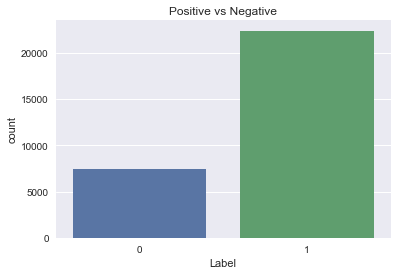

In [162]:
_ = sns.countplot(x = 'Label', data = reviews)
_ = plt.title('Positive vs Negative')

According to my algorithm, most reviews of the apps are positive, which makes sense since most of the reviews for the apps are around 4 stars. 

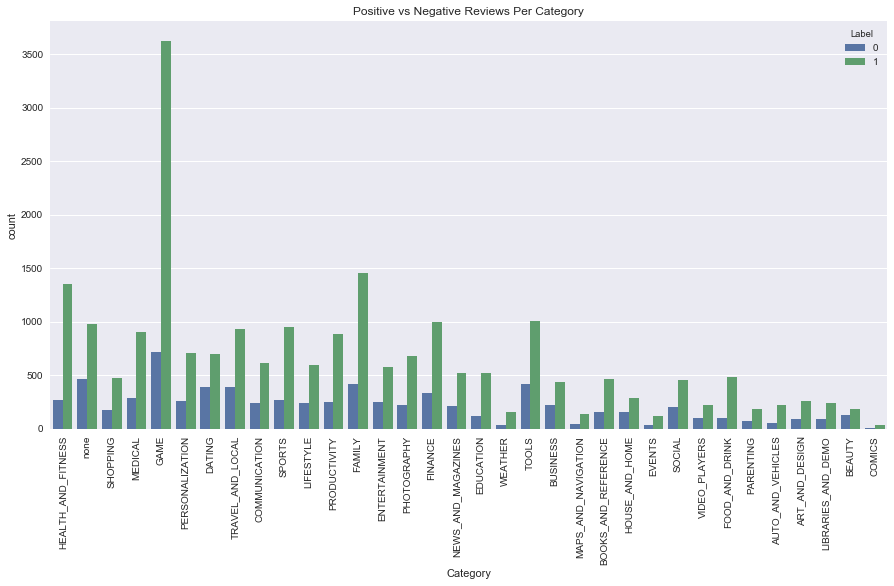

In [163]:
fig, ax = plt.subplots(figsize=(15,7.5))
sns.countplot(x = 'Category', data = reviews, hue = 'Label', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Positive vs Negative Reviews Per Category')

Games have, by far, the most amount of reviews and negative reviews. This is interesting because the game category wasn't even first place in the amount of apps on the Play Store; family was. So it seems like the games category is much more polarizing. 

In [164]:
positive_rate = dict()
for i in reviews['Category'].unique():
    positive = 100*len(reviews.loc[reviews['Category']==i].loc[reviews['Label'] == 1])/len(reviews.loc[reviews['Category'] == i])
    positive_rate[i] = positive

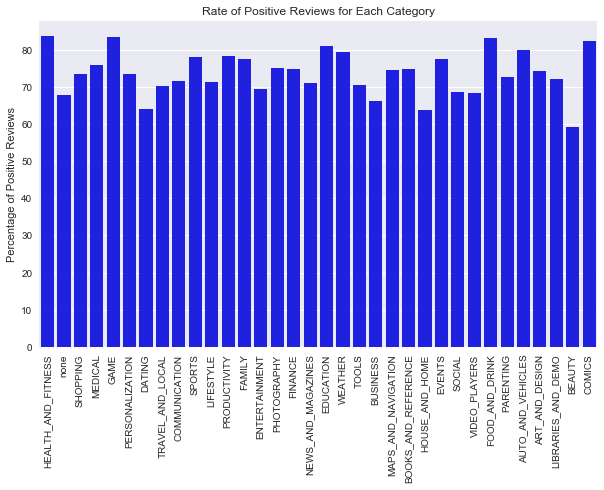

In [165]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(positive_rate.keys()), y = list(positive_rate.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Rate of Positive Reviews for Each Category')
_ = plt.ylabel('Percentage of Positive Reviews')

They are all rated positively at relatively the same rate. 

In [166]:
reviews['App'].nunique()

865

There are only 865 unique apps in this dataset... I don't think it's all the apps from the first dataset.

In [167]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label,Category
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1,HEALTH_AND_FITNESS
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1,HEALTH_AND_FITNESS
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1,HEALTH_AND_FITNESS
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1,HEALTH_AND_FITNESS
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1,HEALTH_AND_FITNESS


In [168]:
avg_rating = dict()
for i in reviews['App'].unique():
    avg_rating[i] = np.mean(reviews.loc[reviews['App'] == i]['Label'])

In [169]:
avg_rating_df = pd.DataFrame({'App':list(avg_rating.keys()), 'avg_rating':list(avg_rating.values())})

In [170]:
avg_rating_df.head()

,App,avg_rating
0,10 Best Foods for You,0.821053
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.861111
2,11st,0.538462
3,1800 Contacts - Lens Store,0.850000
4,1LINE – One Line with One Touch,0.631579


This "avg_rating" is not the average rating that averages the ratings that reviewers gave the app. This is more in line with the way *Rotten Tomatoes* operates, and is merely the percentage of reviews that were considered positive out of all of the reviews. So just because an app may have 100% positive reviews, does not mean that it is the best app ever, just that 100% reviewed it positively. 

In [171]:
with_reviews = avg_rating_df.merge(apps, how = 'inner', on = 'App')

In [172]:
with_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 820
Data columns (total 15 columns):
App               821 non-null object
avg_rating        821 non-null float64
Category          821 non-null object
Rating            821 non-null float64
Reviews           821 non-null int64
Size              821 non-null float64
Installs          821 non-null int64
Type              821 non-null object
Price             821 non-null float64
Content Rating    821 non-null object
Genres            821 non-null object
Last Updated      821 non-null datetime64[ns]
Current Ver       821 non-null object
Android Ver       821 non-null object
Revenue           821 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 102.6+ KB


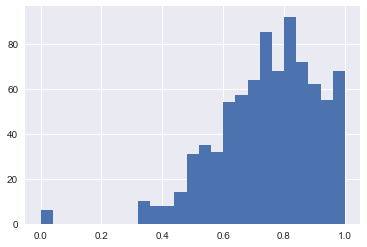

In [186]:
_ = plt.hist(with_reviews['avg_rating'], bins = 25)

Most apps are generally viewed more favorably. 

In [220]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Average Rating',\
              title = 'No correlation betwen avg. Rating and Installs',y_axis_label = 'Number of Installs')
source = ColumnDataSource(data = with_reviews)
plot.circle(x = 'avg_rating', y = 'Installs', size = 7, source = source)
hover_tool = HoverTool(tooltips = [('App', '@App'),('Percent Positive','@avg_rating')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [221]:
corr = np.corrcoef(with_reviews['Installs'], with_reviews['avg_rating'])[0,1]**2
corr

0.0030384559455486296

There doesn't seem to be a correlation between average rating and number of installs. But if there is one, then it is very low. 

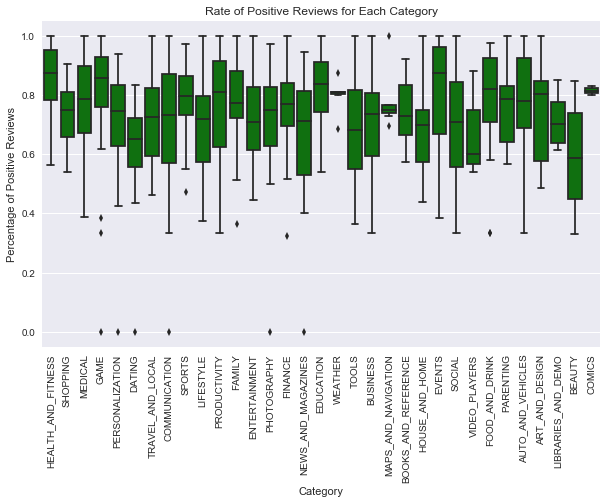

In [222]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.boxplot(x = 'Category', y = 'avg_rating',data=with_reviews, color = 'g', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Rate of Positive Reviews for Each Category')
_ = plt.ylabel('Percentage of Positive Reviews')

There's almost no difference in the ratings by category. 

In [223]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Average Rating',\
              title = 'There is no Correlation between Revenue and Avg. Rating',y_axis_label = 'Revenue')
source = ColumnDataSource(data = with_reviews.loc[with_reviews['Type'] == 'Paid'])
plot.circle(x = 'avg_rating', y = 'Revenue', size = 9, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

Unfortunately, of the apps that were provided in the reviews table, only less than 10 of them are in the "paid" category in the apps table. 

In [224]:
corr = np.corrcoef(with_reviews.loc[with_reviews['Type'] == 'Paid']['Revenue']\
                   , with_reviews.loc[with_reviews['Type'] == 'Paid']['avg_rating'])[0,1]**2
corr

0.00011299005842503686

From this very small sample size, we see that there is no correlation between revenue and the rating the app recieved. 

In [225]:
from bokeh.layouts import row
output_notebook()
plot = figure(plot_width = 400, plot_height = 300, x_axis_label = 'Installs (log)', y_axis_label = 'Revenue', \
              title = 'Revenue vs. Installs on Log Scale', x_axis_type = 'log')
source = ColumnDataSource(data = apps.loc[apps['Type'] == 'Paid'])
plot.circle(x = 'Installs', y = 'Revenue', size = 7, source = source)
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)

plot2 = figure(plot_width = 400, plot_height = 300, x_axis_label = 'Number of Reviews', y_axis_label = 'Revenue',\
               title= 'Revenue vs. Number of Reviews on Log Scale',x_axis_type = 'log')
source = ColumnDataSource(data = apps.loc[apps['Type'] == 'Paid'])
plot2.circle(x = 'Reviews', y = 'Revenue', size = 7, source = source)
plot2.tools.append(hover_tool)
show(row(plot,plot2))

Loading BokehJS ...

As you can see from the above plots of revenue vs installs and number of reviews, on a log scale, there is quite an obvious positive correlation between them. Let us look at the $R^2$ values for these.

In [219]:
corr = np.corrcoef(apps.loc[apps['Type'] == 'Paid']['Installs']\
                   , apps.loc[apps['Type'] == 'Paid']['Revenue'])[0,1]**2
print ("The R^2 value between Installs and Revenue = ", corr)

The R^2 value between Installs and Revenue =  0.4505727745296875


In [217]:
corr = np.corrcoef(apps.loc[apps['Type'] == 'Paid']['Reviews']\
                   , apps.loc[apps['Type'] == 'Paid']['Revenue'])[0,1]**2
print ("The R^2 value between number of Reviews and Revenue = ", corr)

The R^2 value between number of Reviews and Revenue =  0.6960457654366131


In [179]:
with_reviews.to_csv('with_avg.csv')